# 05: Towards Numerical Computing: Linear least squares regression

In this notebook, we will explore the least squares linear regression method, a fundamental technique for fitting a straight line to a set of data points. The goal is to find the line that best describes the relationship between two variables by minimizing the sum of the squared differences (residuals) between the observed values and the values predicted by the line.

Given data points $$(x_i, y_i)$$


the least squares regression line has the equation:

$$
y = mx + b
$$

where:
- $m$ is the slope of the line,
- $b$ is the y-intercept.

The formulas for the slope $m$ and intercept $b$ are:

$$
m = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
b = \bar{y} - m\bar{x}
$$

where $\bar{x}$ and $\bar{y}$ are the means of the $x$ and $y$ values, respectively. This approach ensures that the total squared vertical distance between the data points and the regression line is minimized.

The method is called "least squares" because it minimizes the sum of the squares of the vertical distances (residuals) between the observed data points and the values predicted by the regression line. By squaring the residuals, we ensure that both positive and negative deviations contribute equally to the total error, and larger errors are penalized more heavily. This results in a line that best fits the data in the sense of having the smallest possible total squared error.

The equations above are specifically for a model that is a straight line (linear in the parameters). However, in linear algebra and geophysical inverse theory, the least squares approach can be extended to fit more complex models, including those with multiple parameters or nonlinear relationships. By expressing the problem in matrix form, we can solve for the best-fitting parameters of a wide variety of models, allowing us to analyze more complicated systems and extract meaningful information from data in many scientific and engineering fields


In [2]:
# modules to import
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
# Define some x and y arrays
x = np.array([8,2,11,6,5,4,12,9,6,1])
y = np.array([3,10,3,6,8,12,1,4,9,14])

In [4]:
# find the mean of the x and y values
Xbar = np.mean(x)
Ybar = np.mean(y)

In [5]:
# Get numerator 
m_numerator = np.sum((x - Xbar)*(y - Ybar))
print(m_numerator)

-131.0


In [6]:
# What's inside np.sum?
print(x-Xbar)
print(y-Ybar)

[ 1.6 -4.4  4.6 -0.4 -1.4 -2.4  5.6  2.6 -0.4 -5.4]
[-4.  3. -4. -1.  1.  5. -6. -3.  2.  7.]


In [7]:
# Get denominator of m
m_denominator = np.sum((x - Xbar)**2)
print(m_denominator)

118.39999999999998


In [8]:
# get m
m = m_numerator/m_denominator
print(m)

-1.106418918918919


In [9]:
## get b
b = Ybar - m*Xbar
print(b)

14.081081081081082


### Great, but how can I view my results more intuitively?

Next, we will visualize our regression results for the first time in this class using the `matplotlib` library. Visualization is a crucial step in data analysis, as it allows us to better understand patterns, trends, and relationships within our data. By plotting our data points and the best-fit regression line, we can visually assess how well our model describes the observed data.

`matplotlib` is a widely used Python library for creating static, interactive, and animated visualizations. It provides a flexible interface for generating a wide variety of plots, such as scatter plots, line graphs, histograms, and more. In scientific computing and data analysis, `matplotlib` is often the go-to tool for quick and informative visualizations.

When creating plots, there are several important considerations:
- **Clarity:** Ensure that your plots are easy to read and interpret. Use clear labels for axes, titles, and legends where appropriate.
- **Context:** Choose the right type of plot for your data and the story you want to tell. For example, scatter plots are ideal for visualizing relationships between two variables.
- **Aesthetics:** Use colors, markers, and line styles to distinguish different data series or highlight important features, but avoid unnecessary clutter.
- **Reproducibility:** Include code and settings that allow others to recreate your plots.

By plotting both the original data points and the regression line, we gain valuable insight into the fit of our model and can more effectively communicate our findings.

(0.0, 15.0)

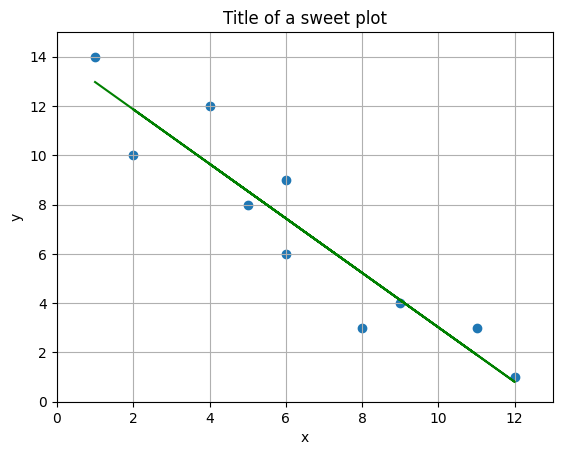

In [13]:
## We will first plot the DATA (x and y values)
## Then we will plot the best-fit line

## Data
plt.scatter(x,y)

## plot best fit line (y = mx + b)
bestfitting_y = m*x + b
plt.plot(x,bestfitting_y,color='green')

## Let's put some labels
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title of a sweet plot')

plt.grid()
plt.xlim(0, 13)
plt.ylim(0, 15)


The plot above displays the original data points as a scatter plot, representing the observed relationship between the variables \(x\) and \(y\). Overlaying these points is the best-fit regression line, calculated using the least squares method. This line visually summarizes the trend in the data, showing how \(y\) tends to change as \(x\) increases or decreases.

We chose this type of plot because it allows us to clearly see both the individual data points and the overall linear relationship captured by the regression model. By including axis labels, a title, and grid lines, the plot is made more readable and informative. This visualization helps us quickly assess how well the regression line fits the data and whether a linear model is appropriate for describing the relationship between \(x\) and \(y\).

### That seemed like a lot fo work, was there an easier path???

Many well-known algorithms, such as least squares regression, are often already implemented in popular scientific computing libraries. This means you don't always need to code these methods from scratch—instead, you can use reliable, pre-coded functions provided by modules like `scipy`. For example, `scipy.stats.linregress` offers a convenient way to perform linear least squares regression, saving time and reducing the chance of errors in your workflow. Leveraging these built-in tools allows you to focus more on interpreting results and less on re-implementing standard algorithms.

In [14]:
## how to do this with scipy
lst_squares = scipy.stats.linregress(x,y)
print(lst_squares)



LinregressResult(slope=-1.1064189189189186, intercept=14.08108108108108, rvalue=-0.9344184402913377, pvalue=7.473261078418828e-05, stderr=0.1491074289251368, intercept_stderr=1.0834683839610169)


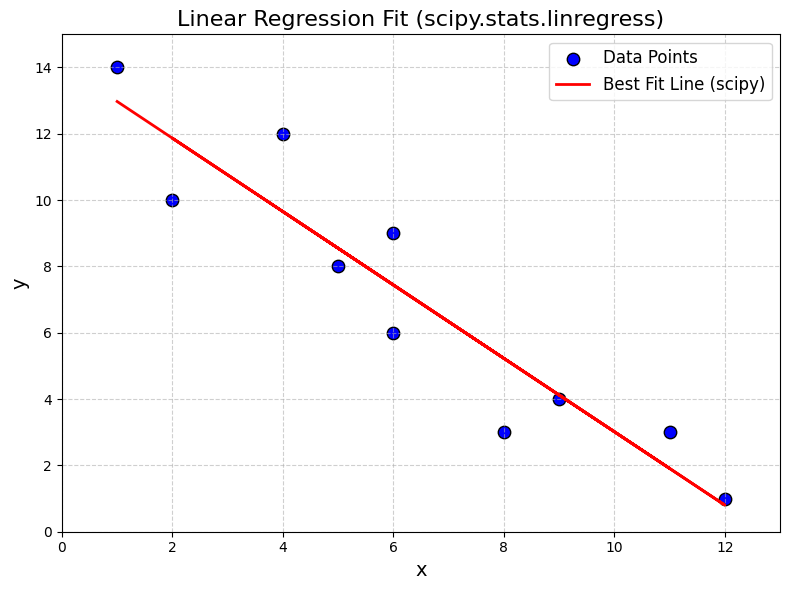

In [16]:
## Data
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data Points', s=80, edgecolor='k')

## plot best fit line (y = mx + b)
bestfitting_y_scipy = lst_squares.slope * x + lst_squares.intercept
plt.plot(x, bestfitting_y_scipy, color='red', linewidth=2, label='Best Fit Line (scipy)')

## Add labels, title, legend, and grid
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Linear Regression Fit (scipy.stats.linregress)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 13)
plt.ylim(0, 15)
plt.tight_layout()

# Summary

In this notebook, we explored the concept and implementation of linear least squares regression, a fundamental technique for fitting a straight line to a set of data points. We learned how to:

- **Manually compute the regression line:**  
    Using numpy, we calculated the mean values of \(x\) and \(y\), determined the slope (\(m\)) and intercept (\(b\)) using the least squares formulas, and constructed the best-fit line.

- **Visualize the results:**  
    We plotted the original data points and overlaid the regression line using matplotlib, allowing us to visually assess the fit.

- **Leverage scientific libraries:**  
    We demonstrated how to use `scipy.stats.linregress` to perform linear regression efficiently, confirming that the results matched our manual calculations.

- **Interpret the output:**  
    The regression line equation, slope, intercept, and fit quality (e.g., \(r\)-value) were discussed, providing insight into the relationship between the variables.

Overall, this notebook illustrated both the mathematical foundation and practical application of linear regression, emphasizing the value of visualization and the utility of scientific Python libraries for data analysis.